---------------------------------------------------------------------------------------------------------------------------------------------------

<h1><center> Lab 4 : Clustering </center></h1>


<center>Manish Dangi  </center>


<center>Introduction to Machine Learning </center>


<center> AIW24  </center>


<center>Muhammad Shahin </center>


<center> 15th September 2024</center>

---------------------------------------------------------------------------------------------------------------------------------------------

# Executive Summary

This lab explores clustering techniques on the Breast Cancer Wisconsin dataset, focusing on feature selection, dimensionality reduction, and clustering methods. The key objectives were to identify high-variance features, apply data scaling techniques, reduce dimensionality using Principal Component Analysis (PCA), and evaluate clustering performance using K-Means and Agglomerative Hierarchical Clustering (AHC). The findings reveal that selecting high-variance features significantly improved clustering results, with PCA and MinMax scaling yielding the best performance. AHC with average linkage and the euclidean metric outperformed K-Means.

# Introduction

Clustering is a key technique in unsupervised learning used to group data points based on their inherent similarities. This lab aims to explore various clustering algorithms on a real-world dataset. The Breast Cancer Wisconsin dataset was used, and feature selection, dimensionality reduction, and clustering techniques were applied. Specifically, K-Means and AHC were compared in terms of performance using silhouette scores, while PCA was applied to address dimensionality and multicollinearity. Feature scaling and selection were explored to optimize clustering performance.

# Methodology

## Data Preprocessing

### Import Necessary Libraries

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
# Import necessary libraries for Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

### Loading the Dataset

In [157]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None, 
    names=['ID', 'Diagnosis', 'radius_mean', 'texture_mean',
    'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean',
    'concavity_mean', 'concave_points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
    'concavity_se', 'concave_points_se', 'symmetry_se', 
    'fractal_dimension_se', 'radius_worst','texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst','concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'])

#Incase the code gets cropped when converting to pdf
# Drop the 'ID' and 'Diagnosis' columns
data = data.drop(columns=['ID', 'Diagnosis'])


### Feature selection using Variance
- I applied variance thresholding to select high-variance features, choosing 3000 as the threshold. Two features (area_worst and area_mean) were selected based on their significantly higher variance compared to others.
- Principal Component Analysis (PCA) was employed later to handle any potential multicollinearity by transforming the features into a set of orthogonal components.


Variance of each feature:
 radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave_points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave_points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 32

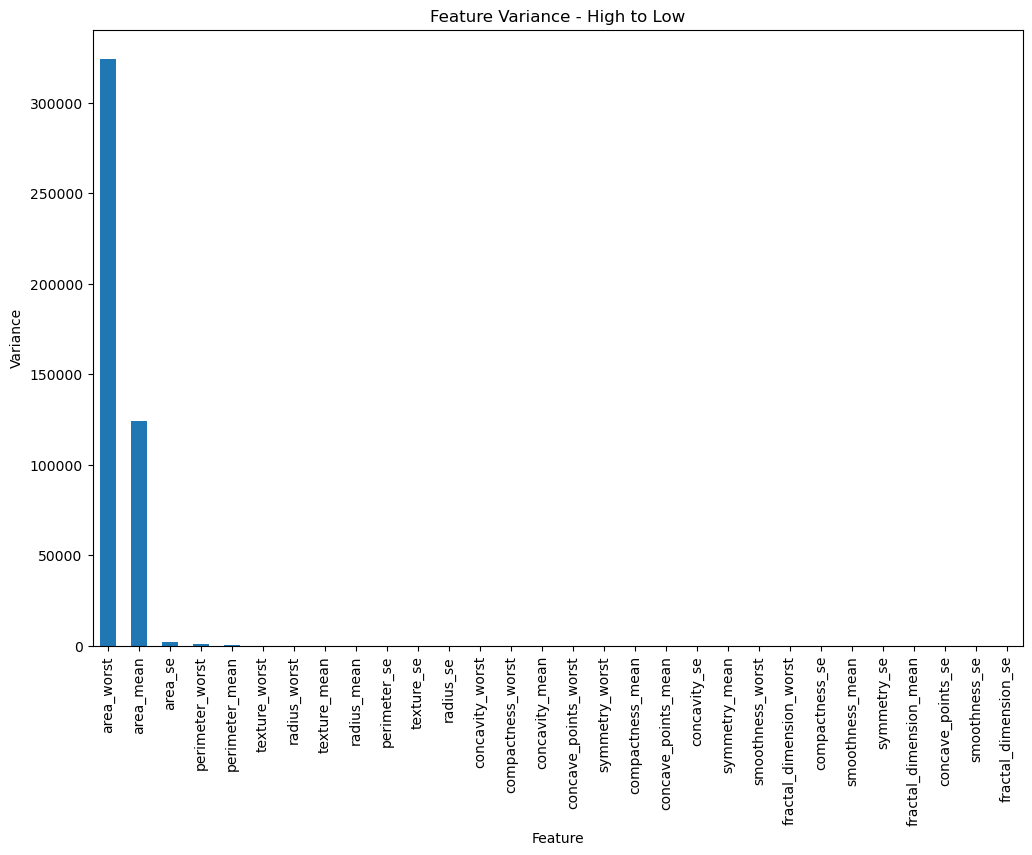

Selected high-variance features:
 Index(['area_mean', 'area_worst'], dtype='object')


In [159]:

# Calculate the variance for each feature
variances = data.var()

# Print the variance of each feature
print("\nVariance of each feature:\n", variances)

# Sort the features by variance in descending order
sorted_variances = variances.sort_values(ascending=False)

# Plot the features in order of high variance to low
plt.figure(figsize=(12, 8))
sorted_variances.plot(kind='bar')
plt.title('Feature Variance - High to Low')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.show()

# Apply VarianceThreshold to filter features with low variance
# Set the variance threshold ; you can adjust this value as needed
selector = VarianceThreshold(threshold=3000)
selector.fit_transform(data)

# Get the feature names that are kept after applying VarianceThreshold
high_variance_columns = data.columns[selector.get_support()]

# Print the selected high-variance features
print("Selected high-variance features:\n", high_variance_columns)

#Selecting features with higher variance
data = data[high_variance_columns] 

### Data Scaling
MinMaxScaler performed better than StandardScaler in this analysis, so it was used to scale the features.

In [161]:

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data)


### K-Means Clustering

#### Elbow Method
The elbow method suggested 2 or 3 clusters, with 2 being the optimal choice.

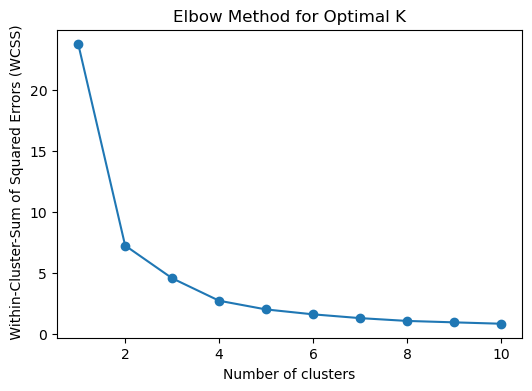

In [164]:


# List to hold WCSS values
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):  # You can adjust the range if needed
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(pca_features)  # Fit on PCA-reduced features
    wcss.append(kmeans.inertia_)  # Append the WCSS for this k

# Plot WCSS vs. number of clusters
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel(" Within-Cluster-Sum of Squared Errors (WCSS)")
plt.show()


#### PCA for dimensionality reduction
PCA reduced the two features to a single component, which explained 95% of the variance.

In [166]:

#  'scaled_features' is your scaled data
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)

# Check the number of PCA components
n_components = pca_features.shape[1]
print(f'Number of PCA components: {n_components}')


Number of PCA components: 1


#### Silhouette Score for K-Means
The silhouette score was calculated for both the original and PCA-reduced features, showing improvement with PCA.

In [168]:
# Apply K-Means clustering to original features
kmeans = KMeans(n_clusters=2,n_init=10, random_state=1)
original_clusters = kmeans.fit_predict(scaled_features)

# Apply K-Means clustering to PCA-reduced features
kmeans_pca = KMeans(n_clusters=2,n_init=10, random_state=1)
pca_clusters = kmeans_pca.fit_predict(pca_features)

# Evaluate clustering performance
silhouette_original = silhouette_score(scaled_features, original_clusters)
print(f'Silhouette Score (Original Features): {silhouette_original:.4f}')

# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_features, pca_clusters)
print(f'Silhouette Score (PCA Features): {silhouette_pca:.4f}')


Silhouette Score (Original Features): 0.6964
Silhouette Score (PCA Features): 0.7093


#### Plotting the features

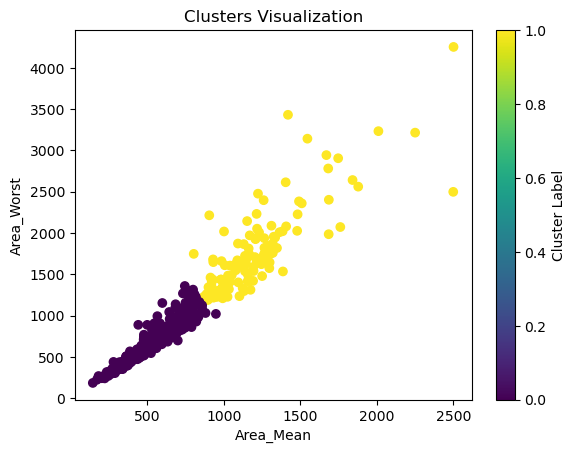

In [170]:

plt.scatter(data['area_mean'], data['area_worst'],
            c=kmeans_pca.labels_, cmap='viridis')
plt.xlabel('Area_Mean')
plt.ylabel('Area_Worst')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster Label')
plt.show()


#### Visualizing silhouette score for different clusters

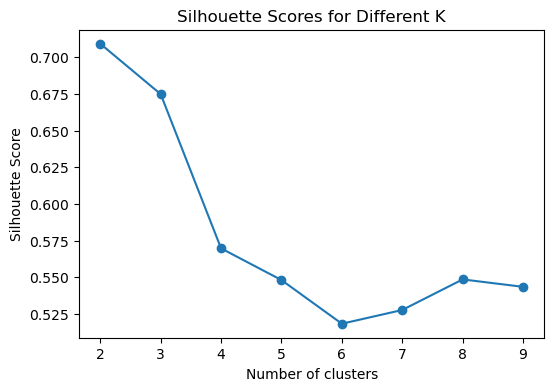

In [172]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(pca_features)  # Fit on PCA-reduced features
    labels = kmeans.labels_  # Access the cluster labels
    score = silhouette_score(pca_features, labels) # Evaluate silhouette score
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


### Agglomerative Hierarchical Clustering (AHC)

AHC was applied using average linkage and the Euclidean distance metric, which outperformed K-Means. A dendrogram is generated to visualize the hierarchical relationships in the dataset.

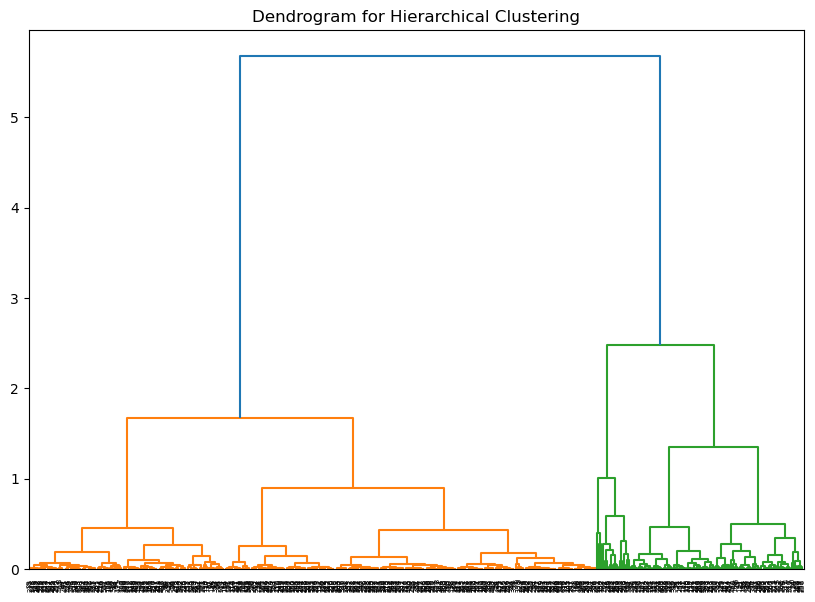

In [176]:


# Apply Agglomerative Clustering (AHC) without PCA
ahc = AgglomerativeClustering(n_clusters=2, metric='euclidean', 
                              linkage='average')
ahc_labels_scaled = ahc.fit_predict(scaled_features)

# Apply Agglomerative Clustering (AHC) with PCA
ahc_labels_pca = ahc.fit_predict(pca_features)

# # Step 2: Apply PCA for visualization 
# #(reduce to 2 components just for plotting)
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(pca_features)


# Optionally, create a dendrogram to visualize hierarchical relationships
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))
plt.show()


#### Silhouette Score for AHC
The silhouette score for Agglomerative Hierarchical Clustering (AHC) improved significantly after applying PCA. This improvement indicates that AHC outperformed K-Means on this dataset, making it the more effective clustering method.

In [178]:

# Evaluate clustering performance
silhouette_ahc = silhouette_score(scaled_features, ahc_labels_scaled)
print(f'Silhouette Score (Agglomerative Clustering) before PCA: {silhouette_ahc:.4f}')

# Evaluate clustering performance
silhouette_ahc = silhouette_score(scaled_features, ahc_labels_pca)
print(f'Silhouette Score (Agglomerative Clustering) after PCA: {silhouette_ahc:.4f}')


Silhouette Score (Agglomerative Clustering) before PCA: 0.7499
Silhouette Score (Agglomerative Clustering) after PCA: 0.7895


# Discussion / Limitations

In this clustering analysis, the focus was on selecting high-variance features to improve clustering performance. While this approach led to a higher silhouette score, it came at the cost of excluding other potentially significant features like `texture`, `concaveness`, `smoothness`,`symmetry` and `compactness`. These features may provide valuable insights in a more holistic analysis.

Since this labwork aimed at optimizing clustering performance, specifically using the silhouette score as the key metric, the exclusion of these features is justified. However, if the goal were to capture a more diverse range of characteristics or provide a more detailed analysis, incorporating these additional features could offer a broader understanding of the dataset. This remains a trade-off between performance and comprehensiveness in the context of unsupervised learning.


# Results and Conclusion

- **Feature Selection:** Selecting high-variance features (`area_mean`, `area_worst`) improved clustering performance, confirmed by a noticeable increase in silhouette score.
- **Scaling:** MinMaxScaler performed better than StandardScaler.
- **Clustering Performance:**
  - **K-Means:** Silhouette score improved slightly from 0.6964 (original) to 0.7093 (PCA).
  - **AHC:** AHC showed significant improvement with PCA, increasing from 0.6822 to 0.7895.
- **Dimensionality Reduction:** PCA was effective in reducing the data to 1 component due to the nature of the selected features.
-  **AHC with average linkage and Euclidean distance performed best after PCA, making it the preferred clustering method for this dataset.**


---------------------------------------------------------------------------------------------------------------------------------------------------